MovieWriter imagemagick unavailable.


[[0 0 1 1 2]
 [0 0 1 2 1]
 [0 0 1 1 2]
 [0 0 2 1 1]
 [0 0 1 1 2]
 [2 0 1 1 0]
 [1 0 1 1 0]]


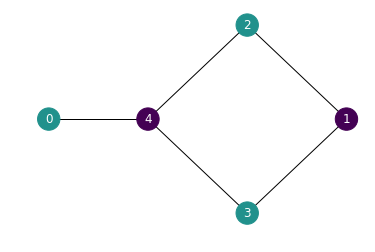

In [128]:
import numpy as np
import networkx as nx
# matplotlib.use("Agg")
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# generate graph
A = np.matrix([
    [1,0,0,0,1],
    [0,1,1,1,0],
    [0,1,1,0,1],
    [0,1,0,1,1],
    [1,0,1,1,1]
])
G=nx.from_numpy_matrix(A)

# G = nx.house_graph()
# explicitly set positions
pos = {0: (0, 1),
       1: (3, 1),
       2: (2, 2),
       3: (2, 0),
       4: (1, 1)}

# generating input frames here, since my data is too big
# its important that the frames go as input and is not generated
# on the fly
# frame = np.random.randint(0, 5, (size, size)) # random ndarray between 0 and 5, length and number of frames = number of nodes in the graph
frame = np.array([
    [0, 0, 1, 1, 2],
    [0, 0, 1, 2, 1],
    [0, 0, 1, 1, 2],
    [0, 0, 2, 1, 1],
    [0, 0, 1, 1, 2],
    [2, 0, 1, 1, 0],
    [1, 0, 1, 1, 0],
])
# number of nodes
size = len(frame)
print(frame)

# draw the topology of the graph, what changes during animation
# is just the color
# pos = nx.spring_layout(G)
nodes = nx.draw_networkx_nodes(G, pos, node_size=500,)
edges = nx.draw_networkx_edges(G, pos)
labels = nx.draw_networkx_labels(G, pos, font_color='w')
plt.axis('off')

# pass frames to funcanimation via update function
# this is where I get stuck, since I cannot break
# out of the loop, neither can I read every array of
# the ndarray without looping over it explicitly
def update(i):
    # for i in range(len(frame)):
    # instead of giving frame as input, if I randomly generate it, then it works
    nc = frame[i] # np.random.randint(2, size=200)
    nodes.set_array(nc)
    return nodes,

# output animation; its important I save it
fig = plt.gcf()
ani = FuncAnimation(fig, update, interval=50, frames=range(size), blit=True)
ani.save('bee_coloring.gif', writer='imagemagick',  savefig_kwargs={'facecolor':'white'}, fps=0.5)

MovieWriter imagemagick unavailable.


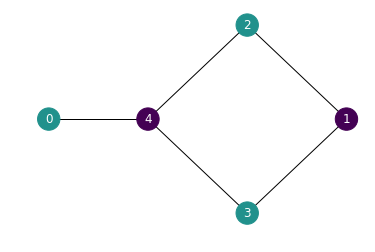

In [129]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# generate graph
A = np.matrix([
    [1,0,0,0,1],
    [0,1,1,1,0],
    [0,1,1,0,1],
    [0,1,0,1,1],
    [1,0,1,1,1]
])
G = nx.from_numpy_matrix(A)

# explicitly set positions of nodes
pos = {0: (0, 1),
       1: (3, 1),
       2: (2, 2),
       3: (2, 0),
       4: (1, 1)}


# generating input frames
frame = np.array([
    [0, 0, 1, 1, 2],
    [0, 0, 1, 2, 1],
    [0, 0, 1, 1, 2],
    [0, 0, 2, 1, 1],
    [0, 0, 1, 1, 2],
    [2, 0, 1, 1, 0],
    [1, 0, 1, 1, 0],
])

# number of nodes
size = len(frame)

# draw the topology of the graph, what changes during animation
# is just the color
nodes = nx.draw_networkx_nodes(G, pos, node_size=500,)
edges = nx.draw_networkx_edges(G, pos)
labels = nx.draw_networkx_labels(G, pos, font_color='w')
plt.axis('off')

# pass frames to funcanimation via update function
def update(i):
    nc = frame[i]
    nodes.set_array(nc)
    return nodes,

# save animation
fig = plt.gcf()
ani = FuncAnimation(fig, update, interval=50, frames=range(size), blit=True)
ani.save('bee_coloring.gif', writer='imagemagick',  savefig_kwargs={'facecolor':'white'}, fps=0.5)
